# Diabetes Study

### Download dataset from url

In [2]:
import requests

url = 'https://hastie.su.domains/Papers/LARS/diabetes.data'
r = requests.get(url, allow_redirects=True)

open('diabetes.data', 'wb').write(r.content)

After running this code one, file is downloaded. No need to run it again

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from collections import Counter

### Open dataset

In [3]:
df = pd.read_csv("diabetes.data", sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


* **Age** and **sex** are self-explanatory
* **BMI** is body mass index
* **BP** is average blood pressure
* **S1** through **S6** are different blood measurements
* **Y** is the qualitative measure of disease progression over one year

### Dataset description

In [4]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


#### Variables information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


#### NULL variables

In [14]:
df.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

#### Variance


In [23]:
var_age = df['AGE'].var()
var_sex = df['SEX'].var()
var_bmi = df['BMI'].var()
var_bp = df['BP'].var()
var_s1 = df['S1'].var()
var_s2 = df['S2'].var()
var_s3 = df['S3'].var()
var_s4 = df['S4'].var()
var_s5 = df['S5'].var()
var_s6 = df['S6'].var()
var_y = df['Y'].var()

In [24]:

print(f"Age Variance = {var_age}\t Sex Variance = {var_sex}\t BMI Variance = {var_bmi}\t BP Variance = {var_bp}")
print(f"S1 Variance = {var_s1}\t S2 Variance = {var_s2}\t S3 Variance = {var_s3}\t S4 Variance = {var_s4}")
print(f"S6 Variance = {var_s6}\t Y Variance = {var_y}")

Age Variance = 171.84661043904742	 Sex Variance = 0.2495613630067412	 BMI Variance = 19.519798124377957	 BP Variance = 191.30440103836406
S1 Variance = 1197.7172407424507	 S2 Variance = 924.9554940437713	 S3 Variance = 167.2935853828711	 S4 Variance = 1.6652609356563137
S6 Variance = 132.16571243882169	 Y Variance = 5943.331347923785


#### Distribution of values

In [51]:
target = df['AGE'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=59, Count=10, Percentage=2.262%
Class=48, Count=14, Percentage=3.167%
Class=72, Count=1, Percentage=0.226%
Class=24, Count=3, Percentage=0.679%
Class=50, Count=13, Percentage=2.941%
Class=23, Count=4, Percentage=0.905%
Class=36, Count=9, Percentage=2.036%
Class=66, Count=6, Percentage=1.357%
Class=60, Count=17, Percentage=3.846%
Class=29, Count=6, Percentage=1.357%
Class=22, Count=4, Percentage=0.905%
Class=56, Count=9, Percentage=2.036%
Class=53, Count=19, Percentage=4.299%
Class=61, Count=14, Percentage=3.167%
Class=34, Count=14, Percentage=3.167%
Class=47, Count=12, Percentage=2.715%
Class=68, Count=7, Percentage=1.584%
Class=38, Count=6, Percentage=1.357%
Class=41, Count=15, Percentage=3.394%
Class=35, Count=7, Percentage=1.584%
Class=25, Count=5, Percentage=1.131%
Class=31, Count=4, Percentage=0.905%
Class=30, Count=3, Percentage=0.679%
Class=19, Count=3, Percentage=0.679%
Class=42, Count=10, Percentage=2.262%
Class=63, Count=4, Percentage=0.905%
Class=67, Count=13, Percenta

In [41]:
target = df['SEX'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=207, Percentage=46.833%
Class=1, Count=235, Percentage=53.167%


### Graphical analysis

#### Histograms

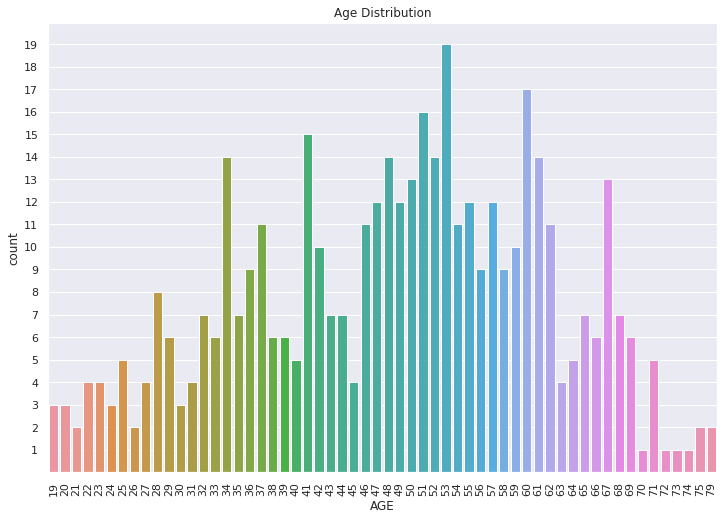

In [6]:
sns.countplot(x='AGE', data=df)
sns.set(rc={'figure.figsize':(12,10)})
plt.xticks(rotation=90)
plt.yticks(np.arange(1,20, step=1))
plt.title("Age Distribution")
plt.show()

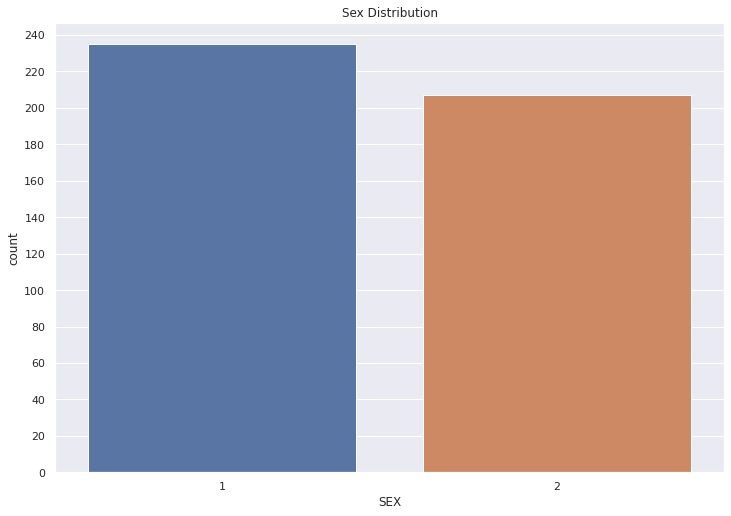

In [12]:
sns.countplot(x='SEX', data=df)
#sns.set(rc={'figure.figsize':(12,8.27)})
#plt.xticks(rotation=90)
plt.yticks(np.arange(0,260, step=20))
plt.title("Sex Distribution")
plt.show()

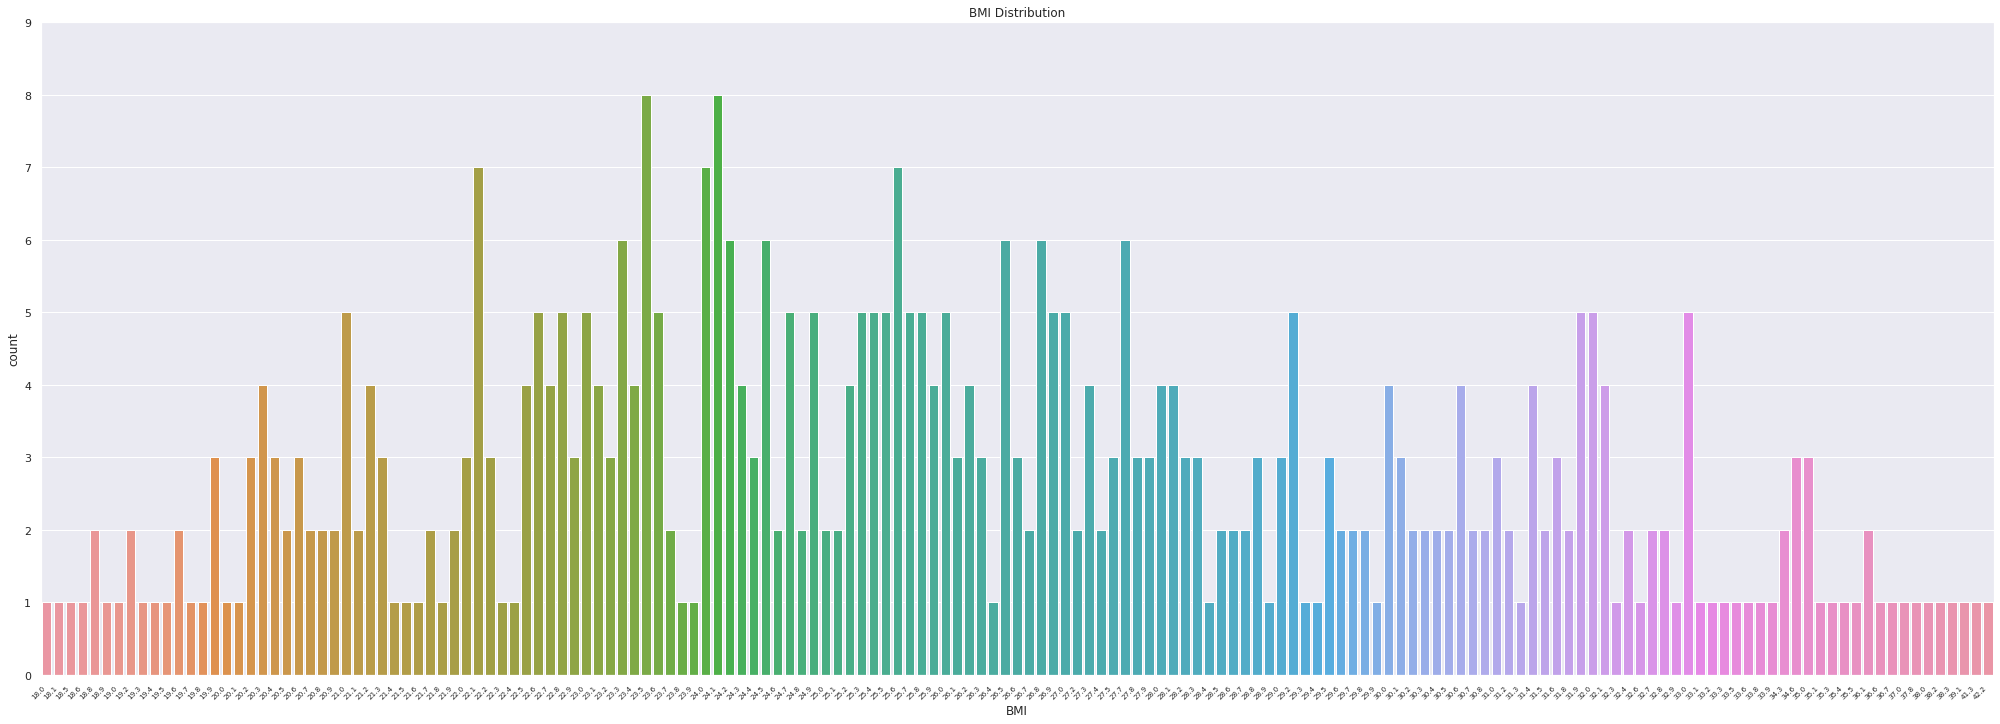

In [48]:
sns.countplot(x='BMI', data=df)
sns.set(rc={'figure.figsize':(35,12)})
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.yticks(np.arange(0,10, step=1))
plt.title("BMI Distribution")
plt.show()

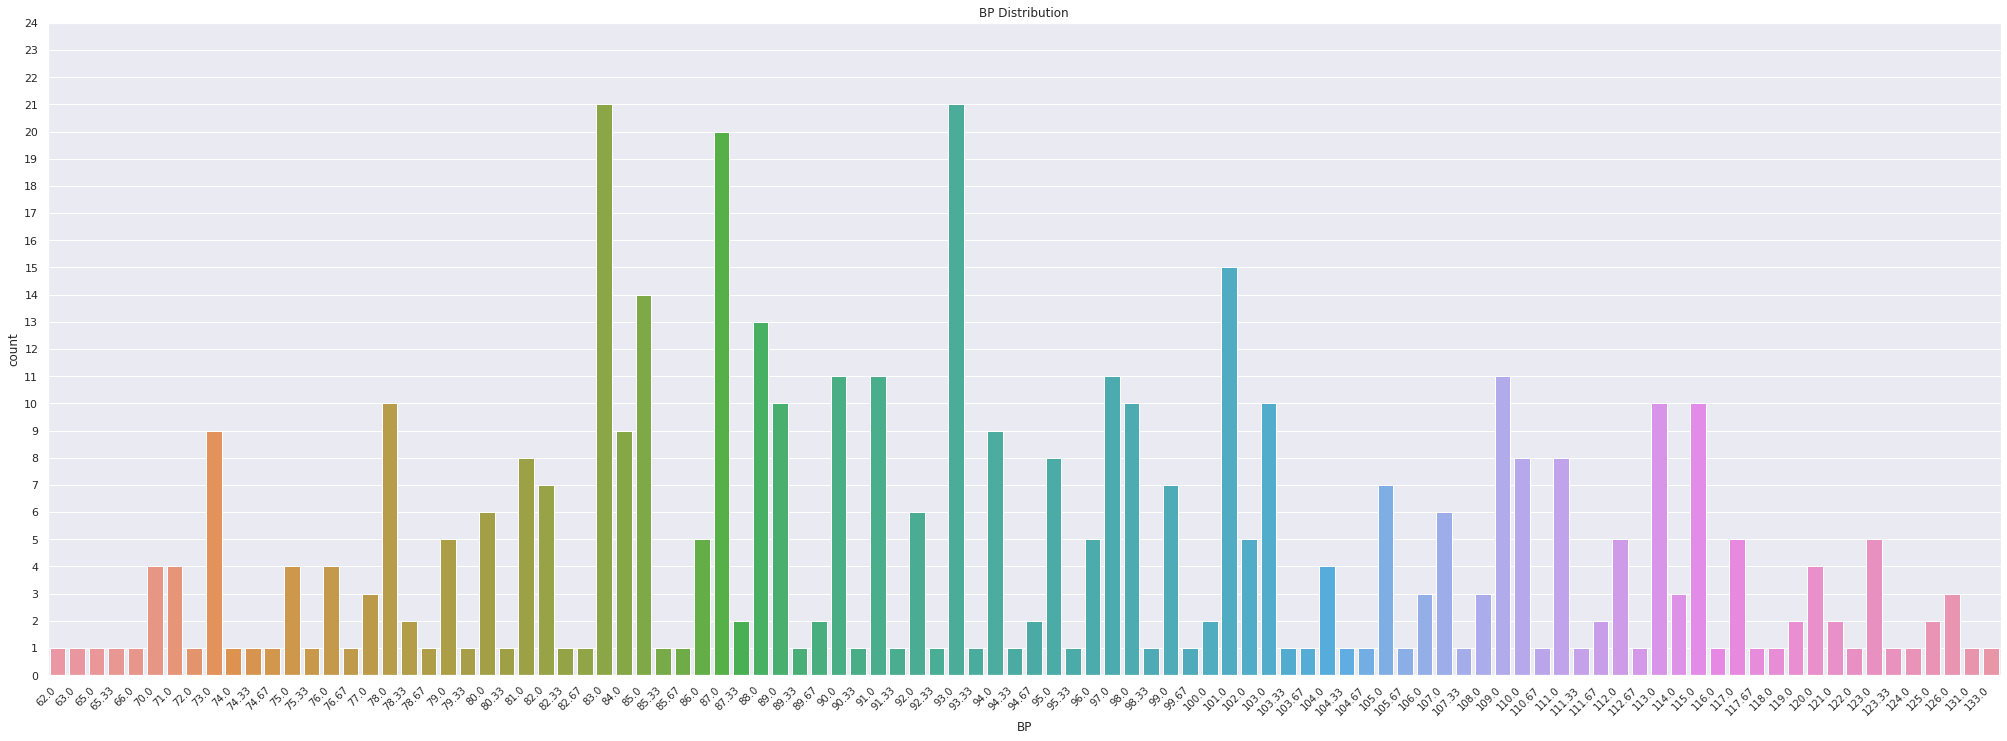

In [49]:
sns.countplot(x='BP', data=df)
sns.set(rc={'figure.figsize':(12,20)})
plt.rcParams.update({'font.size': 7})
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.yticks(np.arange(0,25, step=1))
plt.title("BP Distribution")
plt.show()

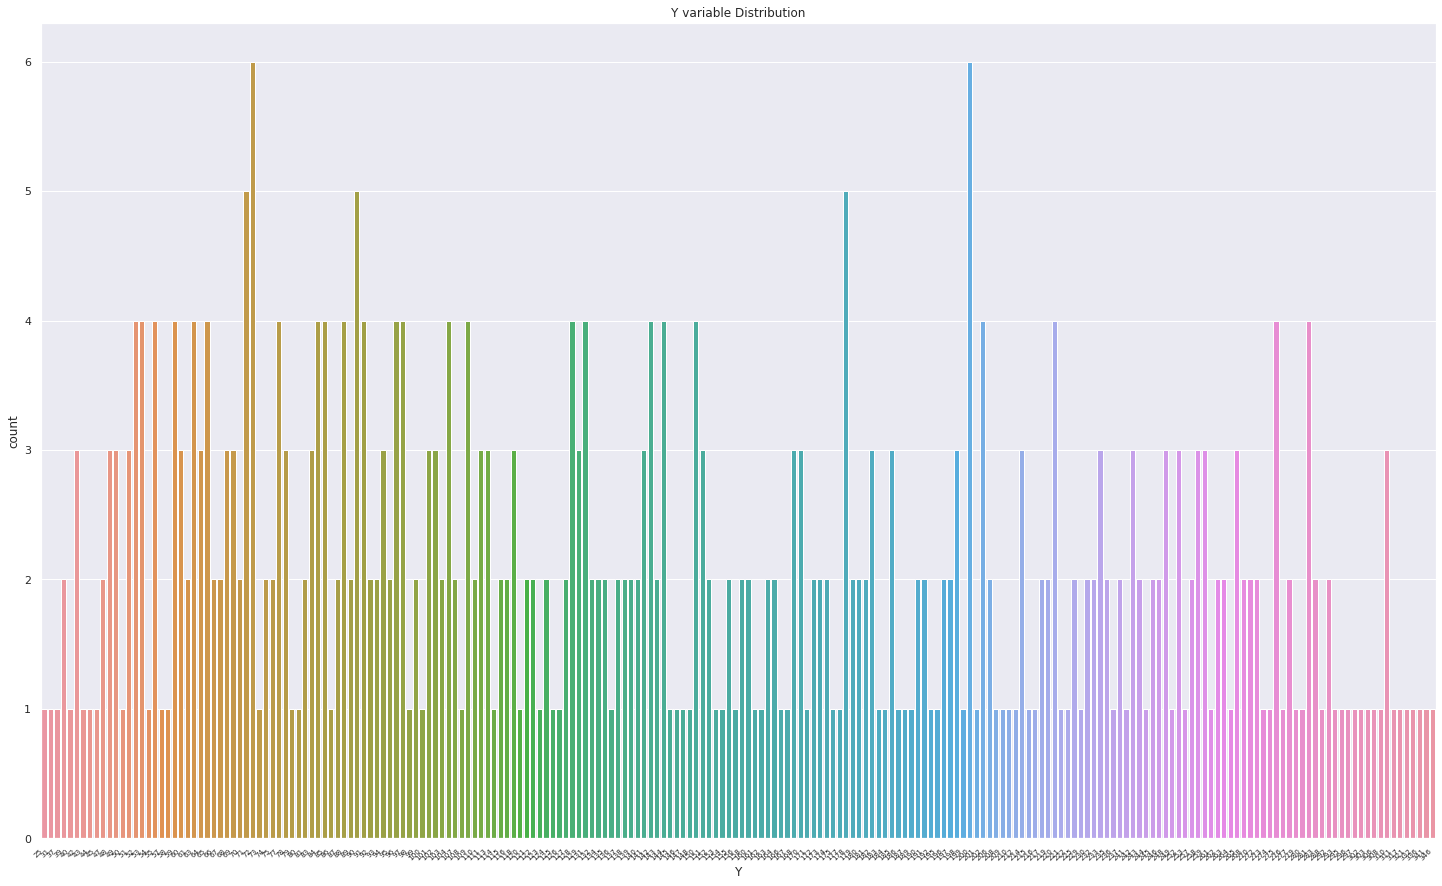

In [52]:
sns.countplot(x='Y', data=df)
sns.set(rc={'figure.figsize':(30,15)})
plt.rcParams.update({'font.size': 5})
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.yticks(np.arange(0,7, step=1))
plt.title("Y variable Distribution")
plt.show()

#### Boxplots

In [64]:
numerical_values = df.drop(['SEX'], axis=1)

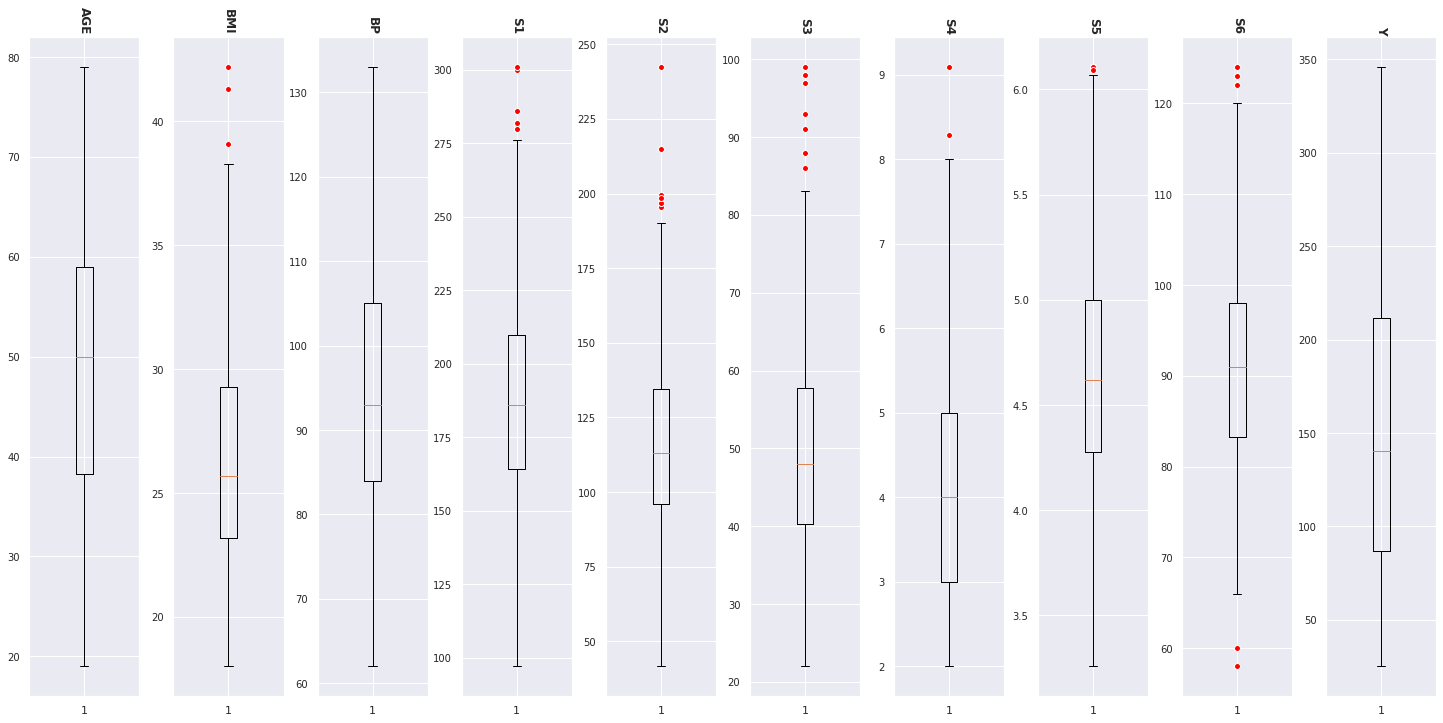

In [65]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(numerical_values.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(numerical_values.iloc[:,i], flierprops=red_circle)
    ax.set_title(numerical_values.columns[i], rotation=270, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()

<AxesSubplot:xlabel='SEX', ylabel='BMI'>

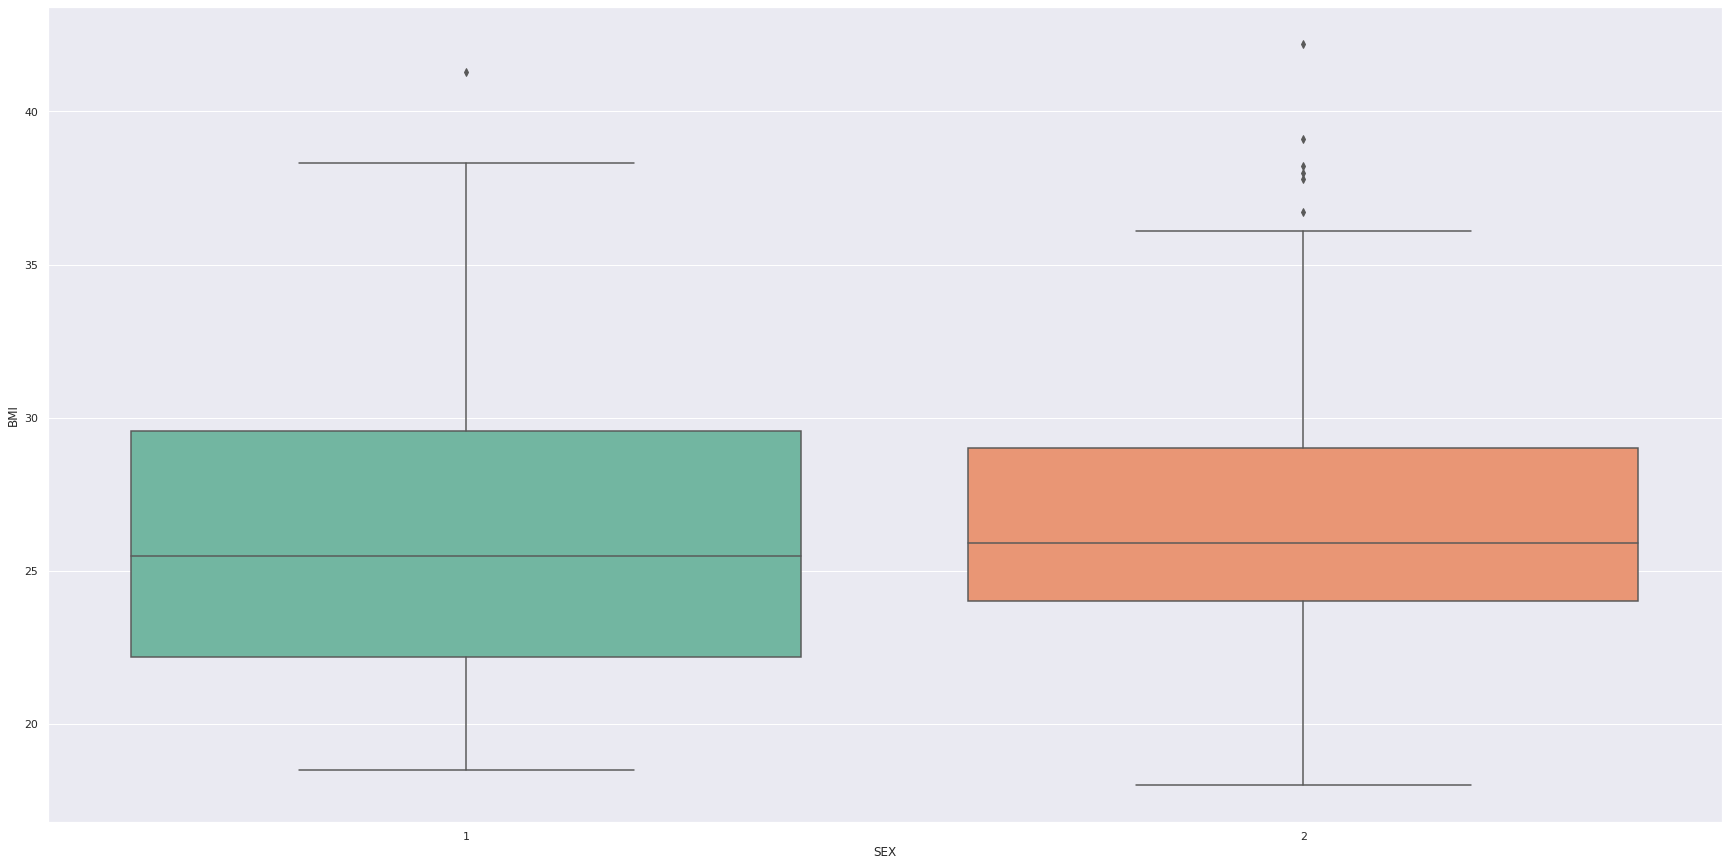

In [57]:
sns.boxplot(x= 'SEX', y= 'BMI', data= df, palette = 'Set2')

<AxesSubplot:xlabel='SEX', ylabel='BP'>

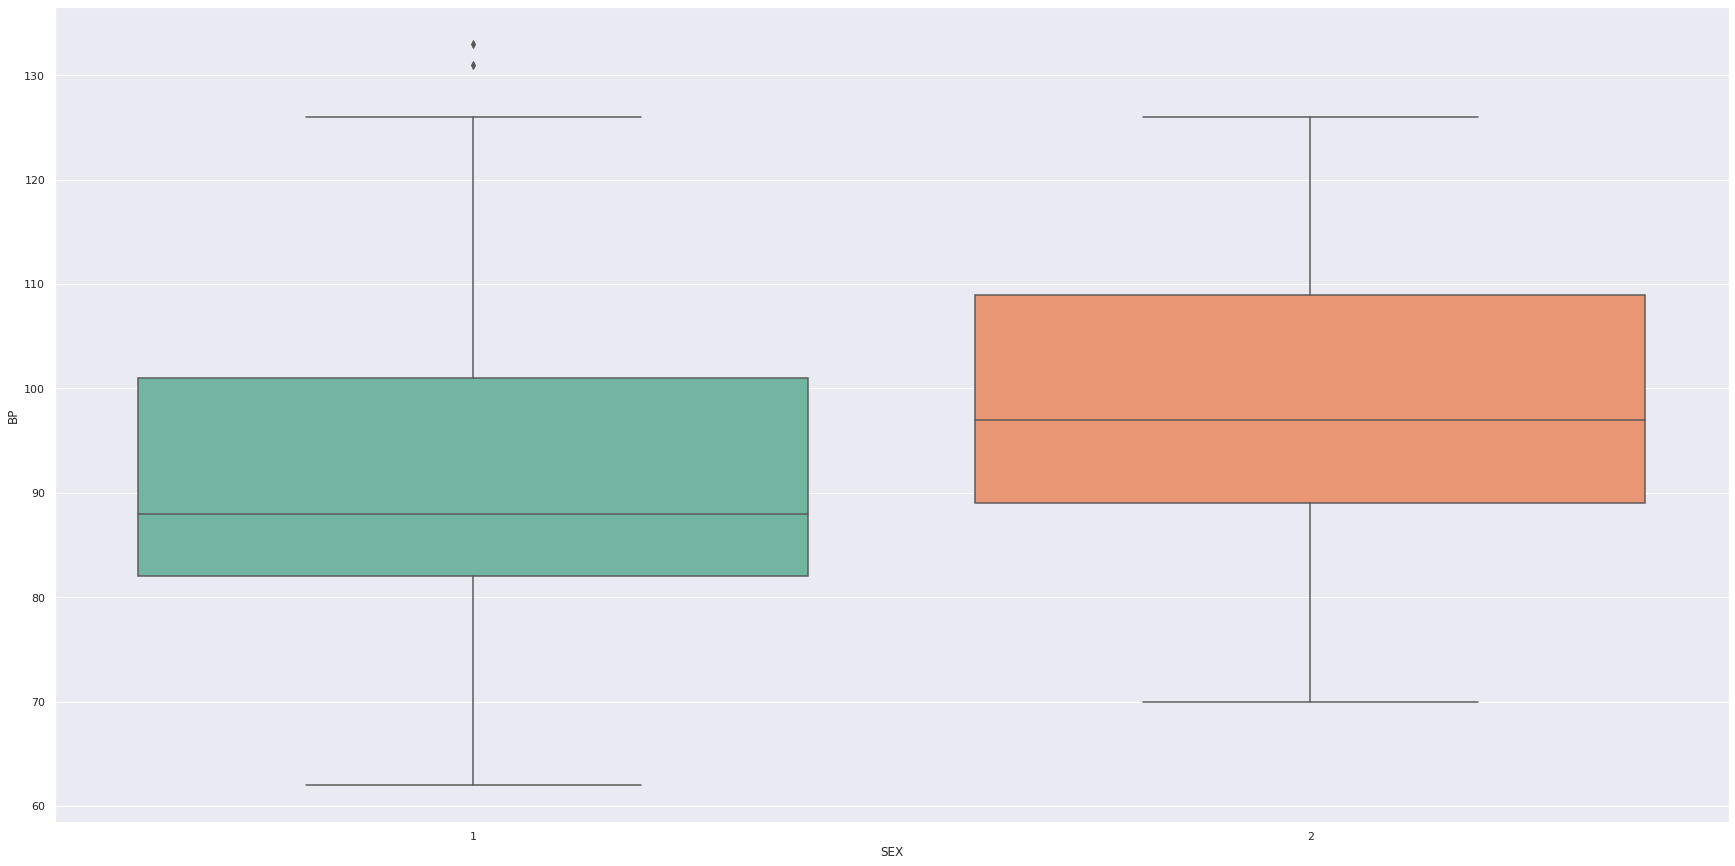

In [58]:
sns.boxplot(x= 'SEX', y= 'BP', data= df, palette = 'Set2')

<AxesSubplot:xlabel='SEX', ylabel='Y'>

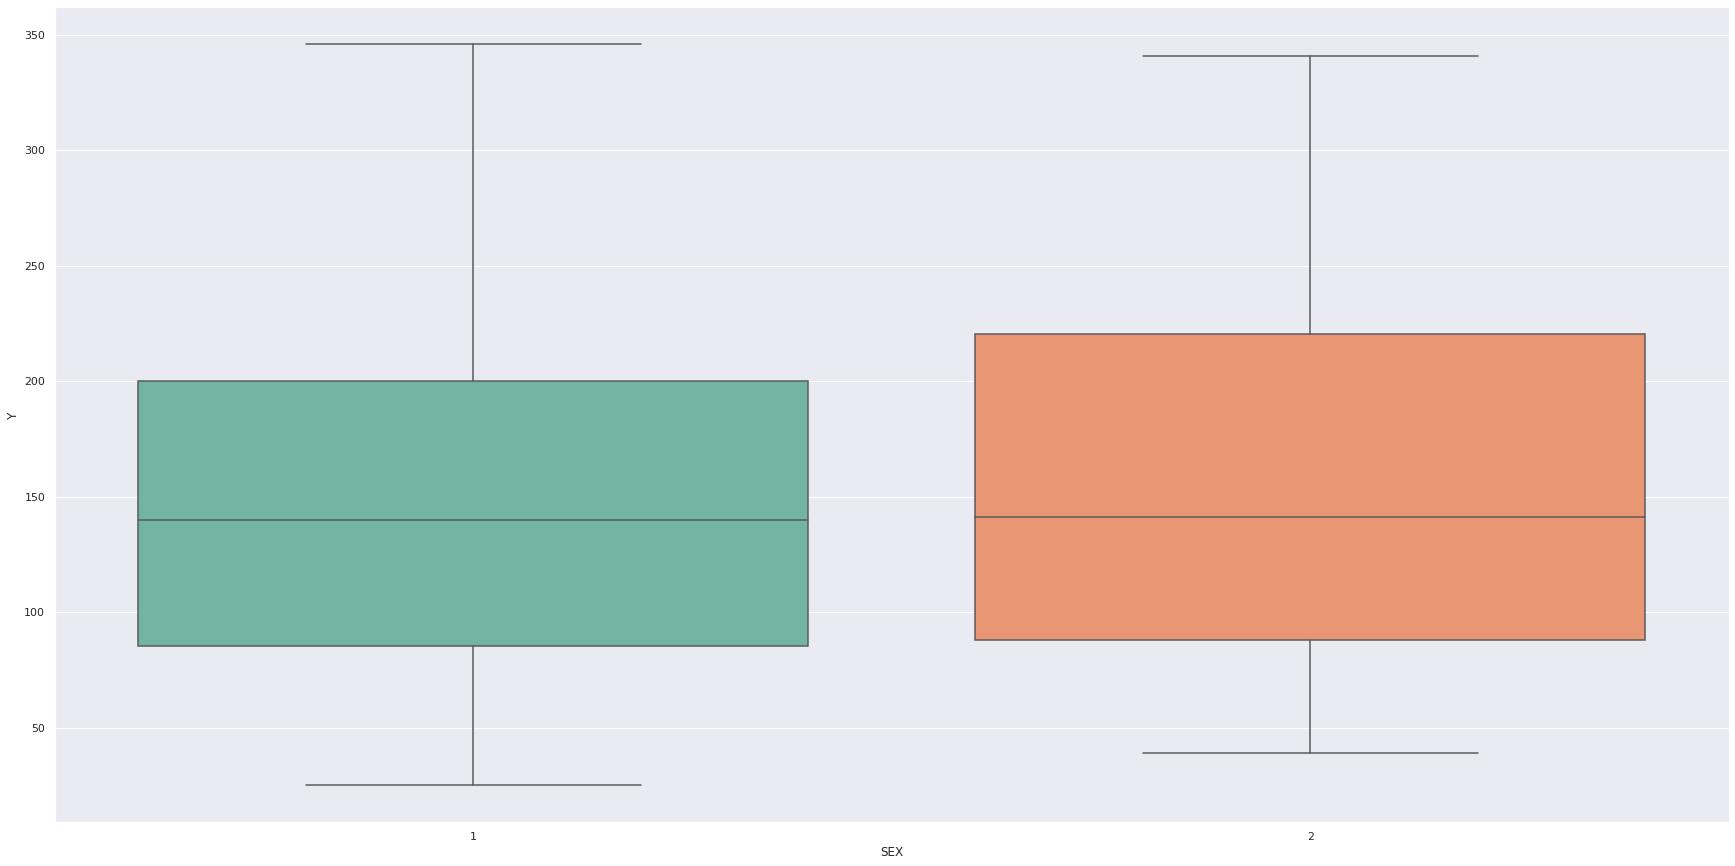

In [59]:
sns.boxplot(x= 'SEX', y= 'Y', data= df, palette = 'Set2')

#### Correlation

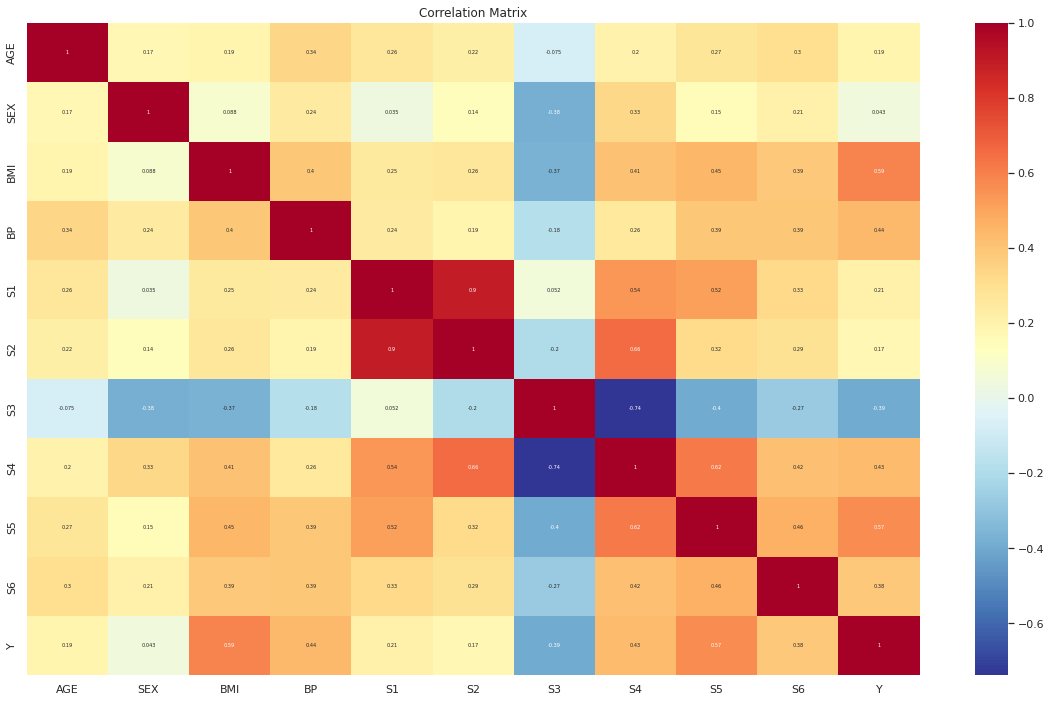

In [61]:
corr_mat = df.corr()
plt.figure(figsize = [20,12])
sns.heatmap(corr_mat, annot = True, cmap = 'RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()